In [1]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.unicode.east_asian_width', True)

import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE #차원축소

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = './malgun.ttf' #내가 쓰고 싶은 폰트 파일 경로로 쓰면 됨. 현재 같은 폴더 안에 있음.
font_name = font_manager.FontProperties(fname=font_path).get_name() #get_name:폰트의 이름을 알려줌.
matplotlib.rcParams['axes.unicode_minus']=False
rc('font', family=font_name)

In [3]:
#모델 load
embedding_model = Word2Vec.load('./model/Word2VecModel_cheeseball.model')

In [4]:
#키워드 입력
key_word = 'bhc'
sim_word = embedding_model.wv.most_similar(key_word, topn=30)
print(sim_word)

[('뿌링클', 0.6840240359306335), ('맛초킹', 0.608475923538208), ('콤보', 0.6005825996398926), ('fried', 0.581794023513794), ('chicken', 0.5773224234580994), ('뿌링', 0.570460855960846), ('jmt', 0.545674204826355), ('feat', 0.5436135530471802), ('bbq', 0.5410497188568115), ('cugs', 0.5405372381210327), ('골드', 0.53653883934021), ('official', 0.5358609557151794), ('food', 0.5264946222305298), ('koreanfood', 0.5233654379844666), ('뿌링소떡', 0.5223461389541626), ('toreore', 0.5152486562728882), ('치킨', 0.5090171098709106), ('make', 0.5069968700408936), ('에이치', 0.5069318413734436), ('lfl', 0.5006119012832642), ('sounds', 0.4965239465236664), ('cheeseball', 0.49082016944885254), ('wow', 0.48896947503089905), ('previous', 0.4888041317462921), ('the', 0.4879433810710907), ('now', 0.48791956901550293), ('bhcbhc', 0.487917959690094), ('eating', 0.48775890469551086), ('foodstagram', 0.48682135343551636), ('instafood', 0.4863348603248596)]


In [5]:
tokens = []
labels = []
for i in sim_word:
    labels.append(i[0])
    tokens.append(embedding_model[i[0]])

C:\ProgramData\Anaconda3\envs\MachineLearning\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [6]:
tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)

In [7]:
df_tokens = pd.DataFrame(tokens)
df_tokens.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,0.160029,0.301292,-0.537806,0.013573,0.321795,0.197124,0.204563,-0.359438,0.438536,0.066778,0.282330,-0.145437,0.218335,-0.512357,-0.193941,0.292437,-0.177457,-0.000438,0.058111,0.066016,-0.106105,-0.062987,-0.300126,0.231753,0.019067,0.105889,0.156368,0.055712,0.328710,-0.242228,0.044146,-0.067302,0.049859,-0.098204,0.117572,-0.548123,-0.297698,0.256449,0.011145,0.163545,-0.161070,0.124138,-0.163089,0.415519,-0.025609,0.170704,-0.275571,0.055773,0.004132,-0.038538,0.062971,0.056024,-0.199982,-0.252107,-0.423953,-0.177201,-0.164804,0.000045,-0.039961,0.233356,-0.068518,0.177010,0.245147,-0.176984,-0.001767,0.258736,0.145394,-0.421296,-0.132396,-0.219578,-0.040808,0.135447,0.421220,-0.206673,-0.110311,0.260437,-0.431459,-0.197152,0.091476,0.407434,-0.093614,0.021200,-0.298277,0.465552,-0.215757,-0.672454,-0.116698,0.345628,0.670826,-0.221652,-0.268459,-0.079639,-0.049964,0.232856,0.379540,0.158729,0.029075,-0.172370,-0.120478,-0.027576
1,0.303735,0.524877,-0.620523,-0.031030,0.332836,0.115356,0.675524,-0.613629,0.479789,-0.448154,0.272353,-0.057714,0.164841,-0.820478,0.114575,0.527075,-0.437985,0.049366,0.259574,-0.060258,0.064678,-0.325064,-0.315848,-0.120533,0.154927,0.294969,0.055160,0.243784,0.326673,-0.403580,0.030071,-0.163625,0.199299,0.049433,0.400253,-0.116195,-0.230832,0.252463,0.277741,-0.033573,-0.052916,0.152672,0.130773,0.537088,-0.405811,-0.133289,-0.335778,-0.047203,0.122689,0.253505,0.237350,-0.015872,-0.300898,-0.347691,-0.606145,-0.185124,-0.226838,0.154583,0.073805,0.150523,-0.431082,0.282496,0.206055,-0.487754,0.114757,0.193431,0.219531,-0.656994,-0.066133,-0.510843,0.260739,-0.472937,0.489223,-0.636583,-0.328608,0.489040,-0.061953,-0.046035,-0.030124,0.418206,0.120126,-0.075428,-0.224006,0.950373,-0.094646,-0.897800,0.363216,0.289733,0.736605,-0.029658,-0.157295,0.317553,-0.252980,0.218426,0.403075,-0.010640,-0.224876,0.026422,-0.187355,0.088717
2,0.017206,0.551396,-0.750716,-0.619041,0.055393,0.348092,-0.200648,-0.509450,0.597571,-0.334821,0.064976,-0.401243,0.095941,-0.440383,-0.133442,0.145606,-0.243017,-0.224642,0.219965,-0.034287,-0.353646,-0.443195,0.335829,0.250035,0.209569,-0.160973,0.541351,0.073978,0.087682,0.019178,0.018449,0.274545,0.093025,0.281754,-0.284463,-0.291637,-0.341000,0.089163,0.133175,-0.041461,0.080141,-0.377373,-0.353376,0.484296,-0.005935,0.004891,-0.169232,-0.365611,-0.254395,0.164554,0.247358,-0.025564,-0.605705,-0.370632,-0.447427,0.192205,-0.350782,0.171160,-0.109786,0.322219,-0.022314,0.054665,0.219171,-0.245082,0.358817,0.088284,-0.013706,0.026630,-0.046480,0.099903,-0.009967,0.383934,0.438985,-0.083383,-0.312570,-0.133084,0.066648,-0.095346,-0.059739,0.440443,-0.233390,0.228207,-0.369630,0.686437,-0.143913,-0.691471,-0.061903,0.191483,0.245087,-0.315095,-0.379636,-0.123638,-0.075588,0.126102,0.442140,0.161182,0.043127,0.129985,-0.079780,-0.062952
3,0.109181,-0.698061,-0.779363,-0.291216,0.542970,-0.121581,-0.308719,-0.730158,0.507893,0.236424,-0.460108,0.397909,-0.339937,-1.428301,0.427335,0.324611,0.639608,-0.715895,0.884424,0.073211,-0.050961,0.342388,-0.407890,-0.727234,0.251395,-0.283366,-0.255441,-0.250330,0.700620,0.320884,-0.232304,-0.443921,-0.494691,-0.390964,0.045544,0.620656,-0.705738,-0.406524,0.529221,0.088169,0.013631,0.098605,-1.077267,0.455073,0.604301,0.750134,-1.126811,0.151871,-1.221446,0.393482,0.252174,0.625779,-0.301697,-0.777537,0.037963,-0.219836,-0.365247,0.113287,-0.803649,-0.358148,0.092549,-0.493923,-0.250943,-0.612125,1.414060,1.084857,0.148108,-1.052065,-0.131275,-1.231700,-0.600668,0.262197,0.293442,0.008638,-0.663924,0.501009,-0.309099,0.204940,-1.111947,0.509181,0.062204,-0.295403,0.345462,0.849741,0.095793,-0.019358,0.097235,-0.071694,0.527234,-0.24654

In [8]:
#100차원 벡터값을 2차원으로 차원축소하여 시각화
new_values = tsne_model.fit_transform(df_tokens)
print(new_values[0])
print(type(new_values))

[-473.65497 -230.13788]
<class 'numpy.ndarray'>


In [9]:
df_xy = pd.DataFrame({'words':labels, 'x':new_values[:,0], 'y':new_values[:,1]})
print(df_xy.head(20))

         words           x           y
0       뿌링클 -473.654968 -230.137878
1       맛초킹 -166.933228 -851.796509
2         콤보  239.080353 -173.871216
3        fried  187.791595  674.154663
4      chicken  -51.423996  171.703888
5         뿌링   71.024483 -386.915619
6          jmt -212.991638 -291.606384
7         feat  195.988083   81.730743
8          bbq  475.388489  517.103821
9         cugs  200.506958  358.332092
10        골드  146.993713 -696.020508
11    official  674.473389 -383.562134
12        food  493.088379 -110.068436
13  koreanfood  358.443359 -420.415161
14    뿌링소떡  -13.640454 -108.553101
15     toreore -788.289856  -58.785927
16        치킨 -715.050110 -414.224487
17        make -440.297150 -583.708496
18      에이치 -144.610748 -553.094910
19         lfl  447.778595  177.463409


In [10]:
df_xy.loc[df_xy.shape[0]] = (key_word, 0, 0)
print(df_xy.tail()) 

          words           x           y
26       bhcbhc  725.079346  289.746399
27       eating -148.037720  738.332886
28  foodstagram -316.784515  280.206146
29    instafood -680.508484  324.662567
30          bhc    0.000000    0.000000


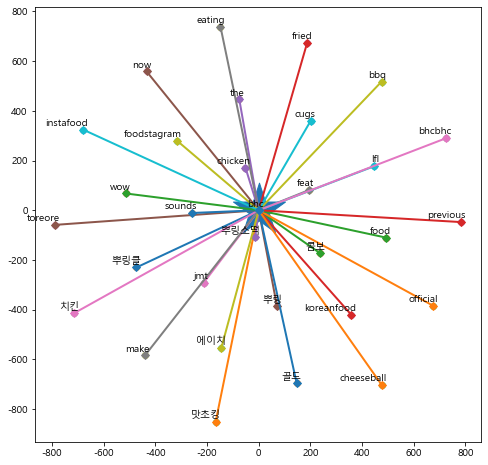

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(0,0,s=3000, marker='*')
for i in range(len(df_xy.x)):
    a = df_xy.loc[[i, 30], :]
    plt.plot(a.x, a.y, '-D', linewidth=2)
    plt.scatter(df_xy.x[i], df_xy.y[i])
    plt.annotate(df_xy.words[i], xy=(df_xy.x[i], df_xy.y[i]), xytext=(5,2), textcoords='offset points', ha='right', va='bottom')
plt.scatter
plt.show()